In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint


In [4]:
df = pd.read_excel(r'/Users/ulissesmiranda/Documents/GitHub/reebee_analysis/reebee_sample.xlsx')
print (df)

/Users/ulissesmiranda/Documents/GitHub/reebee_analysis

    category ID  retailer ID  campaign ID campaign Start Date  \
0             4            1        45653          2018-08-30   
1             4            1        45942          2018-09-06   
2             4            1        46526          2018-09-27   
3             4            1        46218          2018-09-20   
4             4            1        46160          2018-09-13   
5             4            2        45654          2018-08-30   
6             4            2        45943          2018-09-06   
7             4            2        46527          2018-09-27   
8             4            2        46219          2018-09-20   
9             4            2        46161          2018-09-13   
10            4            3        41998          2018-09-13   
11            4            3        46105          2018-09-07   
12            4            3        46513          2018-09-20   
13            4            3        46693          2018-09-27   
14            4          

NameError: name 'Users' is not defined

In [5]:
new_df = pd.DataFrame(df)
new_df

,category ID,retailer ID,campaign ID,campaign Start Date,campaign End Date,number of Pages (in Flyer),language\n0= both\n2= French only,Number of Unique Flyer Engegaments,Number of Total Flyer Engagements,Number of Unique Users,Total Minutes Spent on Flyer,Number of Unique Page Engagements,Number of Pages,Number of Items Added to Shopping List,Number of Clicks to Retailers Website
0,4,1,45653,2018-08-30,2018-09-05,4,0,7363,11919,9295,9778.86,25423,4,2064,23
1,4,1,45942,2018-09-06,2018-09-12,4,0,22568,30748,22542,24816.08,79153,4,5596,45
2,4,1,46526,2018-09-27,2018-10-03,4,0,24766,33051,24753,28002.31,87918,4,7039,45
3,4,1,46218,2018-09-20,2018-09-26,4,0,24828,34550,24807,30675.58,86425,4,7310,43
4,4,1,46160,2018-09-13,2018-09-19,2,0,26906,35684,26875,24107.65,50408,2,5074,24
5,4,2,45654,2018-08-30,2018-09-05,4,2,3369,4948,3919,4125.49,11533,4,798,13
6,4,2,45943,2018-09-06,2018-09-12,4,2,8586,11248,8577,8768.06,29490,4,2284,12
7,4,2,46527,2018-09-27,2018-10-03,4,2,9268,11951,9263,10176.05,32513,4,2519,9
8,4,2,46219,2018-09-20,2018-09-26,4,2,9666,12876,9656,11324.54,33154,4,2885,9
9,4,2,46161,2018-09-13,2018-09-19,4,0,10340,13598,10334,11572.81,36122,4,2817,5


In [6]:
clean_df_hist = df[['Number of Total Flyer Engagements']]
clean_df_hist

,Number of Total Flyer Engagements
0,11919
1,30748
2,33051
3,34550
4,35684
5,4948
6,11248
7,11951
8,12876
9,13598


Through the histogram below we can verify that the data is not well distribute as it does not show a Bell shaped curve. This means that the average calculation does not output a number with good quality tomake decisions.  

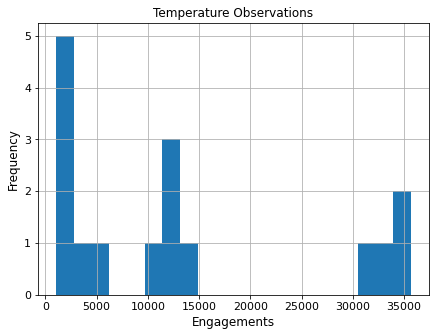

In [7]:
clean_df_hist.hist(bins=20, figsize=(7,5))
plt.xlabel('Engagements', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.title("Temperature Observations")
plt.show()

Here is a few statistical indicators to visualize the quality of the data. 

In [9]:
clean_df_hist.describe()

,Number of Total Flyer Engagements
count,16.000000
mean,13274.250000
std,12904.146685
min,1039.000000
25%,2213.000000
50%,11583.500000
75%,17885.500000
max,35684.000000


In [10]:
scatter_df = df[['Number of Total Flyer Engagements', 'number of Pages (in Flyer)']]
scatter_df

,Number of Total Flyer Engagements,number of Pages (in Flyer)
0,11919,4
1,30748,4
2,33051,4
3,34550,4
4,35684,2
5,4948,4
6,11248,4
7,11951,4
8,12876,4
9,13598,4


This Scatter plot shows a strong negative correlation meaning that flyer with less page has higher engagement. 

However, there is not enough datapoints to determine whether this analyse is accurate. 

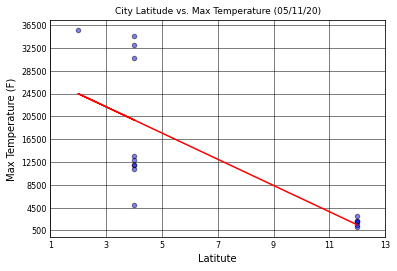

'Correlation coefficient is -0.74.'

In [11]:
correlation = st.pearsonr(scatter_df["number of Pages (in Flyer)"], scatter_df["Number of Total Flyer Engagements"])
rounded_cor = (f"Correlation coefficient is {round(correlation[0],2)}.")
rounded_cor


slope, intercept, rvalue, pvalue, stderr = linregress (scatter_df["number of Pages (in Flyer)"], scatter_df["Number of Total Flyer Engagements"])
x_values = scatter_df["number of Pages (in Flyer)"]
regress_values = slope * x_values + intercept

eq = "y = " + str(round(slope,2))+ "x + " + str (round(intercept,2))

plt.scatter(scatter_df["number of Pages (in Flyer)"], scatter_df["Number of Total Flyer Engagements"], s=20, c='blue', alpha=0.5, edgecolor='black')
plt.grid(color='black', linewidth=0.5)
plt.plot(x_values, regress_values, color='red')
plt.tick_params(axis='both', length = 0)
plt.rcParams['axes.axisbelow'] = True
plt.title('City Latitude vs. Max Temperature (05/11/20)', fontsize=9)
plt.xticks(np.arange(1, 15, 2), fontsize=8)
plt.yticks(np.arange(500, 40000, 4000), fontsize=8)
plt.xlabel("Latitute")
plt.ylabel("Max Temperature (F)")
 
plt.show()
rounded_cor